# Анализ датасета с kaggle
## Предобработка данных

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data_cars.csv')

In [2]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
ndf = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
ndf.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [6]:
new_name = [column.lower().replace(' ','_') for column in ndf.columns]
ndf.columns=new_name
ndf.shape

(11914, 10)

In [7]:
ndf = ndf.drop_duplicates()
ndf.shape

(10925, 10)

In [8]:
print(ndf.isnull().sum())

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64


In [9]:
ndf = ndf.dropna() 
ndf.count()

make                 10827
model                10827
year                 10827
engine_hp            10827
engine_cylinders     10827
transmission_type    10827
driven_wheels        10827
highway_mpg          10827
city_mpg             10827
msrp                 10827
dtype: int64

In [10]:
print(ndf.isnull().sum())

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64


## Визуализация данных

<AxesSubplot:xlabel='msrp'>

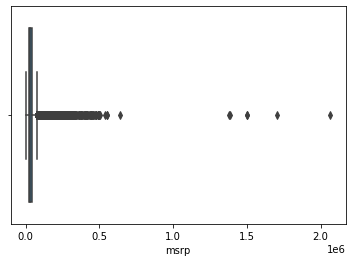

In [11]:
sns.boxplot(x=ndf['msrp'])

<AxesSubplot:xlabel='engine_cylinders'>

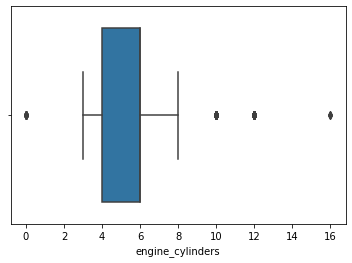

In [12]:
sns.boxplot(x=ndf['engine_cylinders'])


In [13]:
Q1 = ndf.quantile(0.25)
Q3 = ndf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                    9.0
engine_hp             130.0
engine_cylinders        2.0
highway_mpg             8.0
city_mpg                6.0
msrp                21327.5
dtype: float64


Text(0.5, 0, 'Make')

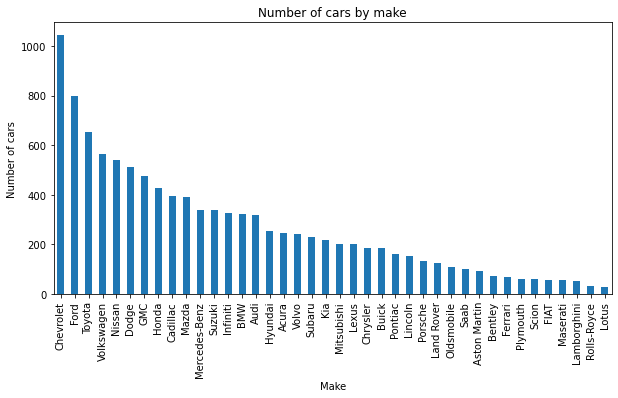

In [14]:
# Plotting a Histogram
ndf.make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

<AxesSubplot:>

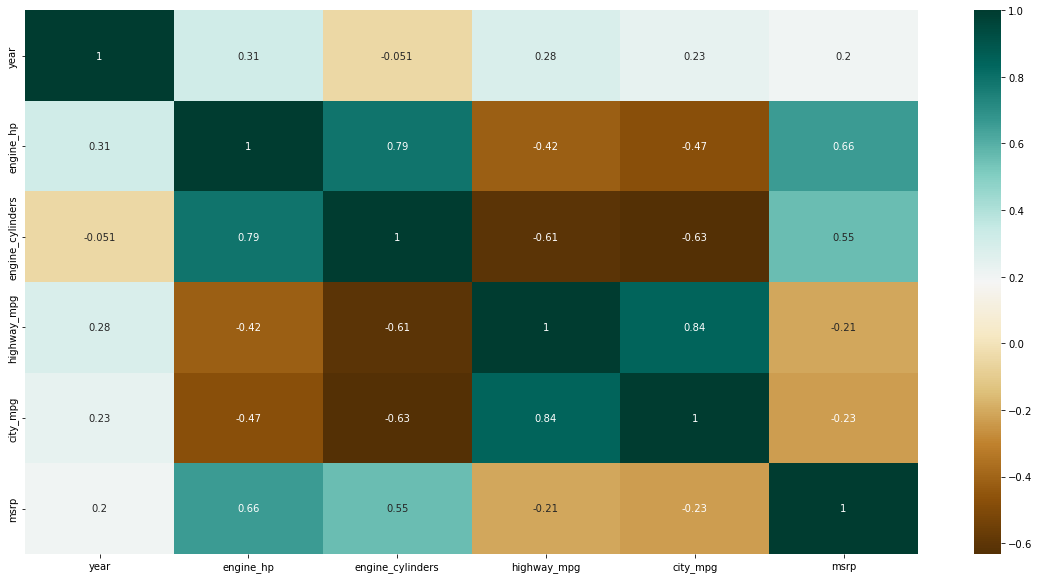

In [15]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= ndf.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

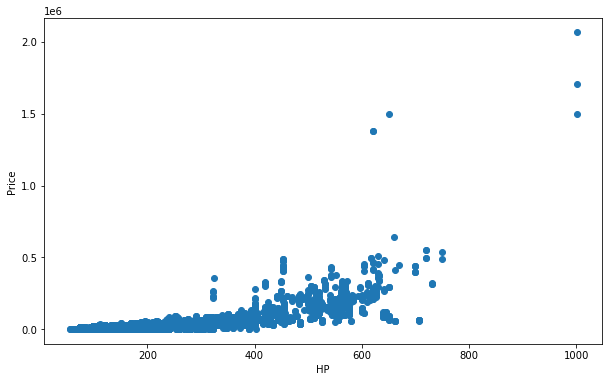

In [16]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(ndf['engine_hp'], ndf['msrp'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()